In [1]:
import pandas as pd
import numpy as np

import os
from os import listdir
from os.path import isfile, join
import gc
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.feature_extraction.text import TfidfVectorizer


# Get all tokenized datasets
tokenized_datasets = [f for f in listdir(os.path.join('..','0_data','datasets')) if isfile(join(os.path.join('..','0_data','datasets'), f)) and 'tokenized' in f]
tokenized_datasets

# Function to get vocab size from td-idf vectorizer
def get_vocabsize(csv_file, ngrams):
    
    # Import tokenized csvs as a list of lists
    with open(os.path.join('..','0_data','datasets',csv_file), 'r') as f:
        tokenized_corpus = []
        for l in f:
            line = l.replace('\n','').split(',')
            tokenized_corpus.append(line)

    # Run TfidfVectorizer
    vectorizer = TfidfVectorizer(tokenizer=lambda x:x, lowercase=False, ngram_range=(ngrams,ngrams))
    vectorizer.fit(tokenized_corpus)
    vocab_size = len(vectorizer.vocabulary_.keys())
    
    # Del tokenized_corpus and vectorizer to free memory
    del tokenized_corpus
    gc.collect()
    
    return vocab_size

In [2]:
list_results = []
for tokenized_dataset in tqdm(tokenized_datasets):
    for ngram in [1,2,3]:
        normalization_type = tokenized_dataset.split('.')[0].split('_')[-1]
        emoji = tokenized_dataset.split('.')[0].split('_')[-3]
        list_results.append([normalization_type, emoji, ngram, get_vocabsize(tokenized_dataset,ngram)])
        
results = pd.DataFrame(list_results, columns=['normalization_type','emoji','ngram','vocabsize'])
results.emoji = results.emoji.replace({'w':'with', 'wo':'without'})

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]C:\Users\frede\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:07<00:00, 21.20s/it]


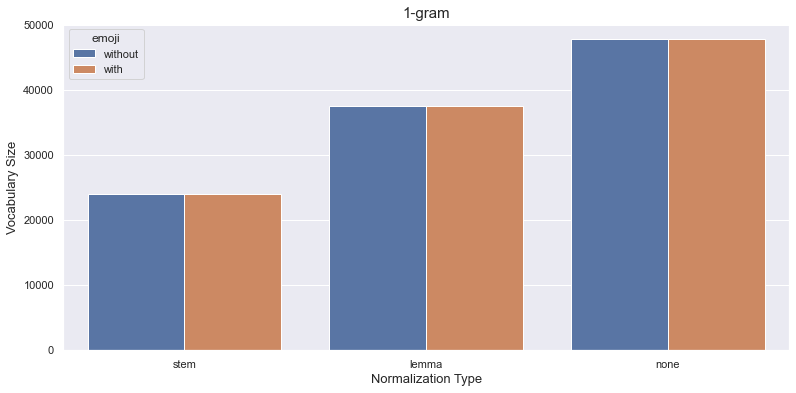

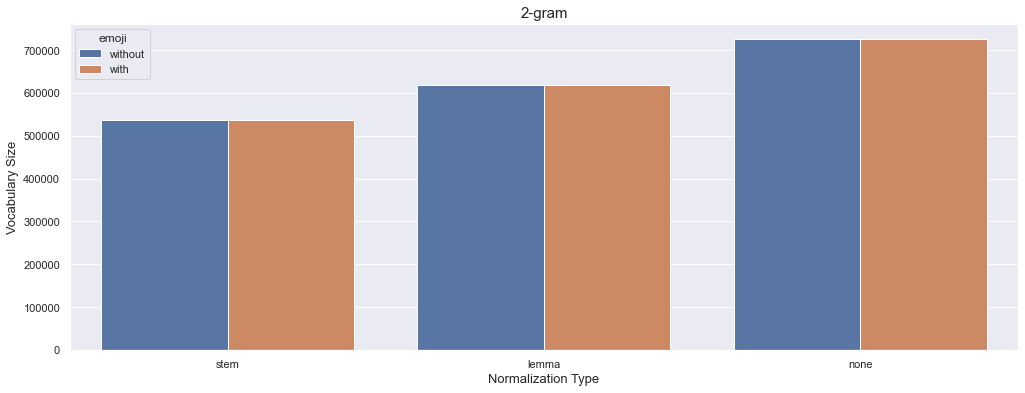

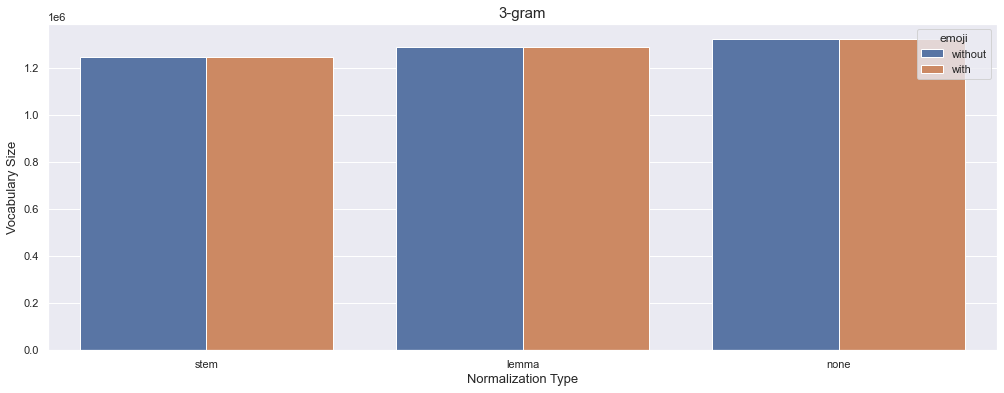

In [3]:
plt.figure(figsize=(13,6))
g = sns.barplot(x='normalization_type', y='vocabsize', hue='emoji', data=results[results.ngram==1].sort_values(by='vocabsize'))
g.set_title('1-gram', size=15)
g.set_xlabel('Normalization Type', size=13)
g.set_ylabel('Vocabulary Size', size=13)

plt.figure(figsize=(17,6))
g = sns.barplot(x='normalization_type', y='vocabsize', hue='emoji', data=results[results.ngram==2].sort_values(by='vocabsize'))
g.set_title('2-gram', size=15)
g.set_xlabel('Normalization Type', size=13)
g.set_ylabel('Vocabulary Size', size=13)

plt.figure(figsize=(17,6))
g = sns.barplot(x='normalization_type', y='vocabsize', hue='emoji', data=results[results.ngram==3].sort_values(by='vocabsize'))
g.set_title('3-gram', size=15)
g.set_xlabel('Normalization Type', size=13)
g.set_ylabel('Vocabulary Size', size=13);

In [3]:
results

,normalization_type,emoji,ngram,vocabsize
0,lemma,wo,1,37495
1,lemma,wo,2,617499
2,lemma,wo,3,1286601
3,none,wo,1,47718
4,none,wo,2,725062
5,none,wo,3,1320635
6,stem,wo,1,23927
7,stem,wo,2,536094
8,stem,wo,3,1243798
9,lemma,w,1,37508
